# PmagPy structure

## The GUI programs

Some of the common data conversion and analysis functionality of PmagPy is exposed within the GUI programs as we saw yesterday. However, the capabilities of PmagPy extend well beyond what is in the GUIs and can access within the command line programs and as functions that can imported as Python modules.

## The command line programs

As an example, let's consider a situation where we want to draw random samples from a specified Fisher distribution. This can be done with the command line program **fishrot.py**. We can learn a little bit about fishrot.py in the [PmagPy Cookbook](https://earthref.org/PmagPy/cookbook/#x1-1050005.2.43). The command line programs take flags. Type this command at the terminal to learn about them: 

```
fishrot.py -h
```

For example, if we want to sample 10 directions from a Fisher distribution with a mean declination of 45, a mean inclination of 30 and a kappa of 20, we would use this command in terminal:

```
fishrot.py -k 20 -n 10 -D 45 -I 30
```

Let's look at the code of fishrot.py on Github: https://github.com/PmagPy/PmagPy/blob/master/programs/fishrot.py

We can see within the program that the program uses two functions within pmag.py (```pmag.fshdev``` and ```pmag.dodirot```). Let's look at the source of these functions which is taken from pmag.py into the code cell below:

In [ ]:
def fshdev(k):
    """
    Generate a random draw from a Fisher distribution with mean declination 
    of 0 and inclination of 90 with a specified kappa.

    Parameters
    ----------
    k : kappa (precision parameter) of the distribution

    Returns
    ----------
    dec, inc : declination and inclination of random Fisher distribution draw
    """
    R1=random.random()
    R2=random.random()
    L=numpy.exp(-2*k)
    a=R1*(1-L)+L
    fac=numpy.sqrt((-numpy.log(a))/(2*k))
    inc=90.-2*numpy.arcsin(fac)*180./numpy.pi
    dec=2*numpy.pi*R2*180./numpy.pi
    return dec,inc

def dodirot(D,I,Dbar,Ibar):
    """
    Rotate a declination/inclination pair by the difference between dec=0 and
    inc = 90 and the provided desired mean direction

    Parameters
    ----------
    D : declination to be rotated
    I : inclination to be rotated
    Dbar : declination of desired mean
    Ibar : inclination of desired mean

    Returns
    ----------
    drot, irot : rotated declination and inclination
    """
    d,irot=dogeo(D,I,Dbar,90.-Ibar)
    drot=d-180.
    if drot<360.:drot=drot+360.
    if drot>360.:drot=drot-360.
    return drot,irot

## Using functions in the notebook

To use functions in the notebook we can import PmagPy function modules as in the code cell below. These function modules are:  **pmag**, a module with functions for analyzing paleomagnetic and rock magnetic data that are used within the command lines programs, the GUIs and within **ipmag**, a module with functions that combine and extend **pmag** functions and exposes **pmagplotlib** functions in order to generate output that works well within the Jupyter notebook environment. 

In [13]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import numpy as np
import matplotlib.pyplot as plt

Putting a question mark after a function results in the docstring being displayed.

In [14]:
ipmag.fishrot?

Putting two questions marks displays the docstring and the source code.

In [15]:
ipmag.fishrot??

### Using ipmag.fishrot to simulate Fisher distributed directions

The docstring helps guide us to know what parameters to put into the function. Here let's take 10 samples from a distribution with mean of dec=45, inc= 30 and kappa precision parameter of 20. If simply call the function it will print to the console as in the code cell below. In the code cell below that, we assign the variable to be this this block of declination/inclination values which we call a di_block.

In [16]:
ipmag.fishrot(k=20, n=10, dec=45, inc=30)

[[36.749680856146938, 20.142227719089444, 1.0],
 [37.397590267481064, 26.829826276735677, 1.0],
 [50.07835743762223, 33.169669309444046, 1.0],
 [69.829888723369436, 29.861719378571102, 1.0],
 [87.513296154423415, 22.356143786546873, 1.0],
 [64.564286441782201, 31.707874187942135, 1.0],
 [16.360123374630689, 32.753150546147296, 1.0],
 [22.064704925906767, 19.15959771170872, 1.0],
 [64.785984222965851, 28.508463989268702, 1.0],
 [64.11759641192458, 22.648940049380485, 1.0]]

In [17]:
directions = ipmag.fishrot(k=20, n=10, dec=45, inc=30)

### Plotting directions

Now let's say we want to plot these directions. Let's use the ipmag.plot_di function to do so. We can learn about that function by putting questions marks after it. Shift+tab also displays such information about a function.

In [18]:
ipmag.plot_di?

Following the instructions in the documentation string, let's make a plot and plot the directions.

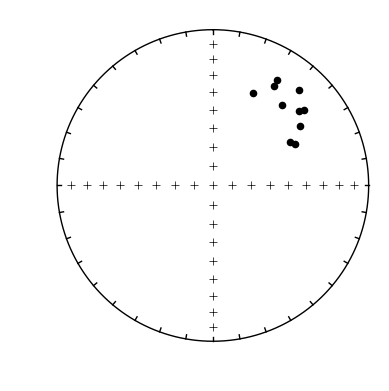

In [19]:
fignum = 1
plt.figure(num=fignum,figsize=(4,4),dpi=160)
ipmag.plot_net(fignum)
ipmag.plot_di(di_block=directions)
plt.show()

### Calculating and plotting a Fisher mean

Let's get more directions and then take their mean. We can calculate the mean using the function **ipmag.fisher_mean**. That function returns a handy python data structure called a dictionary.

In [20]:
lots_of_directions = ipmag.fishrot(k=50, n=100, dec=45, inc=30)
mean = ipmag.fisher_mean(di_block=lots_of_directions)
print(mean)

{'csd': 11.504830130145079, 'k': 49.568938236851551, 'n': 100, 'r': 98.002781509522038, 'alpha95': 2.0275963274097784, 'dec': 45.756689948621158, 'inc': 29.801030819102362}


To access a single element in the dictionary, say the declination ('dec'), we would do it by putting the name of a dictionary and following it with the key related to the value we want to see. We will use this approach to extract and plot the mean dec, inc and $\alpha_{95}$ in the plot below.

In [21]:
mean['dec']

45.756689948621158

Let's plot both the directions (using ipmag.plot_di) and the mean (using ipmag.plot_di_mean).

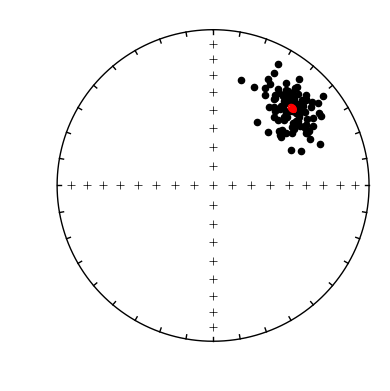

In [22]:
fignum = 1
plt.figure(num=fignum,figsize=(4,4),dpi=160)
ipmag.plot_net(fignum)
ipmag.plot_di(di_block=lots_of_directions)
ipmag.plot_di_mean(mean['dec'],mean['inc'],mean['alpha95'],color='r')
plt.show()

### Calculating directions from the IGRF model using ipmag.igrf

Let's use another **ipmag** function to determine the field predicted by the IGRF model here in La Jolla over the past 100 hundred years. 

**Before we do so, let's all open up ipmag.py in a text editor. Find the function *ipmag.igrf* and report back what functions it uses (hint they are from the pmag.py module).

To determine the IGRF field at a bunch of different years we will first create a list of years using the numpy function **np.linspace**. We can then take these years along with the igrf function and the location of La Jolla to calculate the local direction through time using a for loop.

In [23]:
years = np.linspace(1900,2020)
local_field = []
La_Jolla_lat = 32.8328
La_Jolla_lon = -117.2713

for year in years:
    field = ipmag.igrf([year,0,La_Jolla_lat,La_Jolla_lon])
    local_field.append(field)

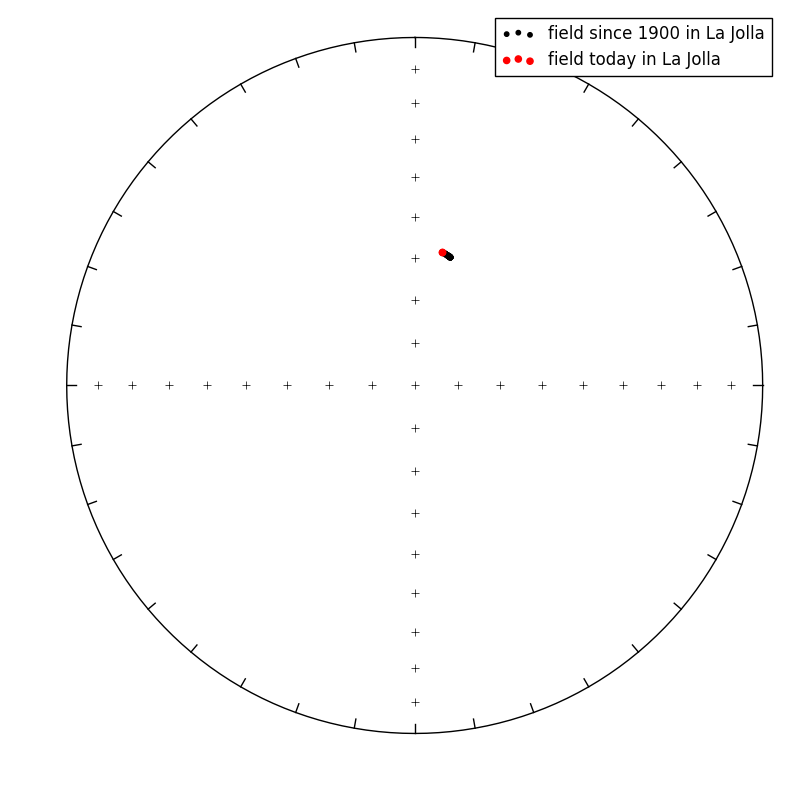

In [24]:
fignum = 1
plt.figure(num=fignum,figsize=(8,8),dpi=160)
ipmag.plot_net(fignum)
ipmag.plot_di(di_block=local_field,markersize=10,label='field since 1900 in La Jolla')
ipmag.plot_di(di_block=local_field[-2:],color='red',label='field today in La Jolla')
plt.legend()
plt.show()